### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway


### Load the data

In [2]:
#load the kaggle dataset 
data = pd.read_csv('fdata.csv')

### EDA and Pre-Proccessing ###

In [3]:
data.head()
data.shape

(2232, 400)

In [4]:
data1 = data.copy()
data = data.iloc[:, np.r_[0:16, 21:37, 46:48, 62:64, 104:107, 113:116, 163:165]]

In [20]:
data

,Unnamed: 0,player,nationality,position,squad,age,birth_year,value,height,position2,...,passes_into_final_third,passes_into_penalty_area,tackles,tackles_won,tackles_def_3rd,pressures,pressure_regains,pressure_regain_pct,saves,save_pct
0,379,Burgui,es ESP,FW\tMF,AlavÃ©s,23,1993,1800000,186,attack - Left Winger,...,28,15,12,7,4,199,47,23.6,0,0.0
1,2530,RaphaÃ«l Varane,fr FRA,DF,Real Madrid,24,1993,70000000,191,Defender - Centre-Back,...,82,3,22,14,18,242,86,35.5,0,0.0
2,721,RubÃ©n Duarte,es ESP,DF,AlavÃ©s,21,1995,2000000,179,Defender - Left-Back,...,41,21,54,29,32,345,83,24.1,0,0.0
3,2512,Samuel Umtiti,fr FRA,DF,Barcelona,23,1993,60000000,182,Defender - Centre-Back,...,118,1,40,26,27,211,85,40.3,0,0.0
4,882,Manu GarcÃ­a,es ESP,MF,AlavÃ©s,31,1986,1800000,183,midfield - Defensive Midfield,...,92,5,90,69,38,615,145,23.6,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,1864,Victor Osimhen,ng NGA,FW\tMF,Wolfsburg,18,1998,1000000,186,attack - Centre-Forward,...,6,0,2,1,1,79,25,31.6,0,0.0
2228,2367,Renato Steffen,ch SUI,FW\tMF,Wolfsburg,25,1991,3500000,170,attack - Right Winger,...,7,4,10,6,6,151,30,19.9,0,0.0
2229,1168,Paul Jaeckel,de GER,DF,Wolfsburg,19,1998,5000,189,Defender - Centre-Back,...,6,5,4,4,4,30,8,26.7,0,0.0
2230,2546,Paul Verhaegh,nl NED,DF,Wolfsburg,33,1983,1000000,178,Defender - Right-Back,...,128,29,30,14,17,291,84,28.9,0,0.0


In [19]:
data.columns.tolist()


['Unnamed: 0',
 'player',
 'nationality',
 'position',
 'squad',
 'age',
 'birth_year',
 'value',
 'height',
 'position2',
 'foot',
 'league',
 'games',
 'games_starts',
 'minutes',
 'goals',
 'goals_per90',
 'assists_per90',
 'goals_assists_per90',
 'goals_pens_per90',
 'goals_assists_pens_per90',
 'xg',
 'npxg',
 'xa',
 'xg_per90',
 'xa_per90',
 'xg_xa_per90',
 'npxg_per90',
 'npxg_xa_per90',
 'minutes_90s',
 'shots_total',
 'shots_on_target',
 'passes_completed',
 'passes',
 'passes_into_final_third',
 'passes_into_penalty_area',
 'tackles',
 'tackles_won',
 'tackles_def_3rd',
 'pressures',
 'pressure_regains',
 'pressure_regain_pct',
 'saves',
 'save_pct']

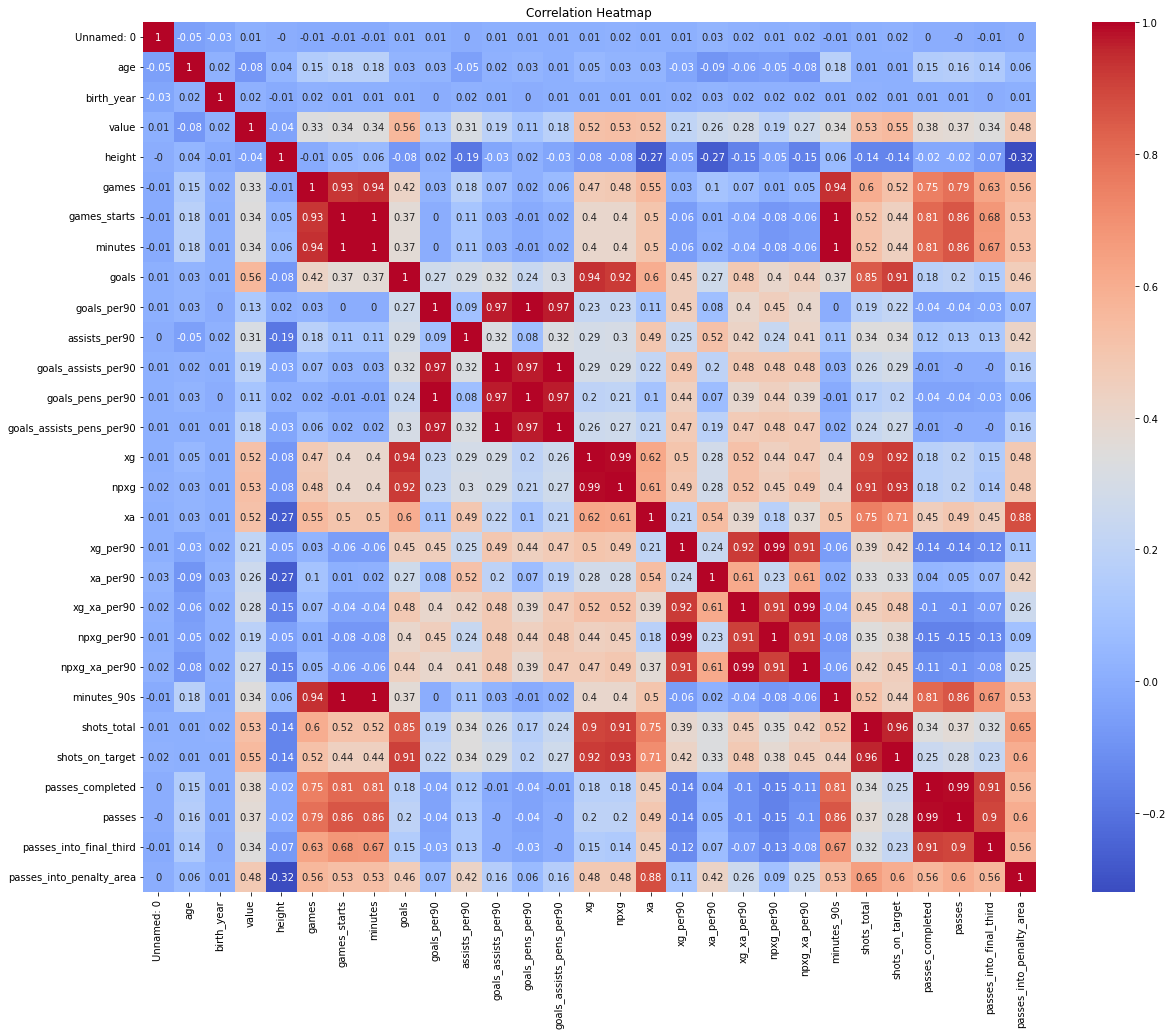

In [22]:
# Computing the correlation matrix
correlation_matrix = data.iloc[:, :-8].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(20,16))
sns.heatmap(correlation_matrix.round(2), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<AxesSubplot:xlabel='goals', ylabel='value'>

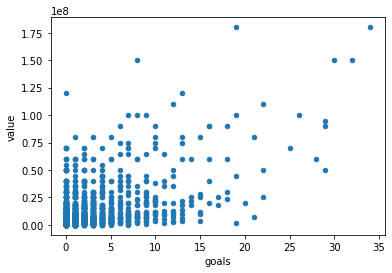

In [23]:
data[['value', 'goals']].plot(kind = 'scatter', x = 'goals', y = 'value')

<AxesSubplot:xlabel='assists_per90', ylabel='value'>

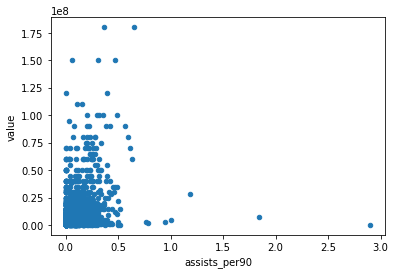

In [24]:
data.plot(kind = 'scatter', x = 'assists_per90', y = 'value')

<AxesSubplot:xlabel='xg', ylabel='value'>

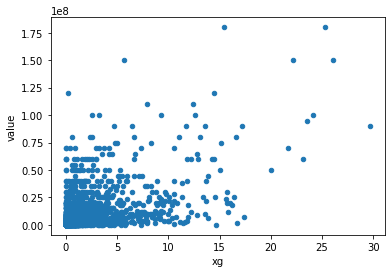

In [25]:
data.plot(kind = 'scatter', x = 'xg', y = 'value')

In [26]:
X = data.iloc[:, 12:]
y = data.value


In [27]:
X

,games,games_starts,minutes,goals,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,...,passes_into_final_third,passes_into_penalty_area,tackles,tackles_won,tackles_def_3rd,pressures,pressure_regains,pressure_regain_pct,saves,save_pct
0,23,12,1037,1,0.09,0.09,0.17,0.09,0.17,0.9,...,28,15,12,7,4,199,47,23.6,0,0.0
1,27,27,2320,0,0.00,0.04,0.04,0.00,0.04,0.9,...,82,3,22,14,18,242,86,35.5,0,0.0
2,24,24,2138,0,0.00,0.08,0.08,0.00,0.08,0.5,...,41,21,54,29,32,345,83,24.1,0,0.0
3,25,24,2189,1,0.04,0.00,0.04,0.04,0.04,1.1,...,118,1,40,26,27,211,85,40.3,0,0.0
4,30,27,2438,3,0.11,0.00,0.11,0.11,0.11,3.1,...,92,5,90,69,38,615,145,23.6,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,12,3,287,0,0.00,0.00,0.00,0.00,0.00,1.1,...,6,0,2,1,1,79,25,31.6,0,0.0
2228,16,6,659,0,0.00,0.00,0.00,0.00,0.00,1.3,...,7,4,10,6,6,151,30,19.9,0,0.0
2229,3,3,270,0,0.00,0.00,0.00,0.00,0.00,0.2,...,6,5,4,4,4,30,8,26.7,0,0.0
2230,31,30,2614,2,0.07,0.07,0.14,0.03,0.10,2.6,...,128,29,30,14,17,291,84,28.9,0,0.0


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [29]:
import statsmodels.api as sm
X = sm.add_constant(X)
ols = sm.OLS(y, X)
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     82.41
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:39:59   Log-Likelihood:                -39406.
No. Observations:                2232   AIC:                         7.888e+04
Df Residuals:                    2199   BIC:                         7.907e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     3.356e+06   8.66e+05      3.874      0.000    1.66e+06    5.05e+06
games                     -4.27e+05    8.4e+04     -5.084      0.000   -5.92e+05   -2.62e+05
games_starts             -5.422e+05   2.45e+05     -2.217      0.027   -1.02e+06   -6.26e+04
minutes                  -2.129e+04   9.82e+04     -0.217      0.828   -2.14e+05    1.71e+05
goals                     1.885e+06   2.32e+05      8.116      0.000    1.43e+06    2.34e+06
goals_per90              -6.795e+07   1.57e+08     -0.432      0.666   -3.77e+08    2.41e+08
assists_per90             7.935e+07   8.16e+07      0.972      0.331   -8.07e+07    2.39e+08
goals_assists_per90       4.767e+07   1.57e+08      0.304      0.761   -2.59e+08    3.55e+08
goals_pens_per90          1.375e+08   1.59e+08      0.865      0.387   -1.74e+08    4.49e+08
goals_assists_pens_per90 -1.174e+08   1.58e+08     -0.744      0.457   -4.27e+08    1.92e+08
xg                        -4.32e+06   9.11e+05     -4.743      0.000   -6.11e+06   -2.53e+06
npxg                      5.709e+06   9.37e+05      6.090      0.000    3.87e+06    7.55e+06
xa                         1.53e+06    3.9e+05      3.919      0.000    7.65e+05     2.3e+06
xg_per90                 -2.394e+07   1.22e+08     -0.196      0.844   -2.63e+08    2.15e+08
xa_per90                 -7.787e+07   5.51e+07     -1.413      0.158   -1.86e+08    3.02e+07
xg_xa_per90                8.04e+07   1.24e+08      0.650      0.516   -1.62e+08    3.23e+08
npxg_per90               -5.595e+07   1.24e+08     -0.453      0.651   -2.98e+08    1.86e+08
npxg_xa_per90            -1.406e+06   1.25e+08     -0.011      0.991   -2.46e+08    2.44e+08
minutes_90s                2.64e+06   8.83e+06      0.299      0.765   -1.47e+07       2e+07
shots_total              -1967.6105   4.92e+04     -0.040      0.968   -9.85e+04    9.46e+04
shots_on_target           4.929e+04    1.3e+05      0.378      0.705   -2.06e+05    3.05e+05
passes_completed          6.973e+04   5673.288     12.290      0.000    5.86e+04    8.09e+04
passes                   -5.376e+04   5885.893     -9.134      0.000   -6.53e+04   -4.22e+04
passes_into_final_third   4.113e+04   1.46e+04      2.817      0.005    1.25e+04    6.98e+04
passes_into_penalty_area  2.695e+05   4.24e+04      6.353      0.000    1.86e+05    3.53e+05
tackles                  -2.148e+04   7.69e+04     -0.279      0.780   -1.72e+05    1.29e+05
tackles_won               7.475e+04   9.14e+04      0.818      0.414   -1.05e+05    2.54e+05
tackles_def_3rd           9.127e+04   7.67e+04      1.190      0.234   -5.92e+04    2.42e+05
pressures                -3.441e+04   7391.010     -4.655      0.000   -4.89e+04   -1.99e+04
pressure_regains          4.955e+04   2.86e+04      1.732      0.083   -6554.397    1.06e+05
pressure_regai

In [30]:
model = LinearRegression()
model.fit(X, y)
r_square = model.score(X, y)
r_square

0.5452961856918042

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

model.fit(X_train, y_train)

in_sample_r_square = model.score(X_train, y_train)
out_of_sample_r_square = model.score(X_test, y_test)

print(f'In sample R square is {in_sample_r_square} \
      Out of sample R square is {out_of_sample_r_square}')

In sample R square is 0.534037180318353       Out of sample R square is 0.5467548629759509


In [34]:
#highest correalation with value

value_vars = correlation_matrix.value.sort_values(ascending = False)
value_vars = value_vars[1:13]
value_vars = value_vars.index.tolist()
value_vars

['goals',
 'shots_on_target',
 'npxg',
 'shots_total',
 'xg',
 'xa',
 'passes_into_penalty_area',
 'passes_completed',
 'passes',
 'passes_into_final_third',
 'games_starts',
 'minutes']

In [35]:
#regression of those variables

X = data.loc[:, value_vars]
X = sm.add_constant(X)
ols = sm.OLS(y, X)
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     159.0
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          3.50e-288
Time:                        13:51:30   Log-Likelihood:                -39593.
No. Observations:                2232   AIC:                         7.921e+04
Df Residuals:                    2219   BIC:                         7.929e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.335e+06   4.63e+05      2.887      0.004    4.28e+05    2.24e+06
goals                     2.131e+06   2.42e+05      8.793      0.000    1.66e+06    2.61e+06
shots_on_target           2.204e+05   1.38e+05      1.594      0.111   -5.08e+04    4.92e+05
npxg                      3.718e+06   6.27e+05      5.932      0.000    2.49e+06    4.95e+06
shots_total              -2.144e+05   5.12e+04     -4.190      0.000   -3.15e+05   -1.14e+05
xg                       -2.626e+06   5.65e+05     -4.648      0.000   -3.73e+06   -1.52e+06
xa                         1.46e+06   3.73e+05      3.912      0.000    7.28e+05    2.19e+06
passes_into_penalty_area  1.692e+05    4.5e+04      3.756      0.000    8.09e+04    2.58e+05
passes_completed           4.65e+04   5741.775      8.099      0.000    3.52e+04    5.78e+04
passes                   -2.749e+04   5904.120     -4.656      0.000   -3.91e+04   -1.59e+04
passes_into_final_third   -2.96e+04   1.44e+04     -2.061      0.039   -5.78e+04   -1430.662
games_starts               -3.8e+05    2.4e+05     -1.585      0.113    -8.5e+05    9.02e+04
minutes                   2129.6835   2910.996      0.732      0.464   -3578.877    7838.244
==============================================================================
Omnibus:                     1390.812   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22986.849
Skew:                           2.654   Prob(JB):                         0.00
Kurtosis:                      17.798   Cond. No.                     6.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
data[['Code Nationality', 'Nationality']] = data.nationality.str.split(" ", expand = True)

In [37]:
nations = ['England', 'Spain', 'Germany', 'Netherlands', 'Brazil', 'Argentina', 'Uruguay', 'France', 'Belgium', 'Sweden', 'Norway', 'Portugal', 'Bulgaria', 'Croatia', 'Serbia', 'Japan', 'Slovakia', 'Italy', 'Ireland', 'Canada', 'Austria', 'Ghana', 'Ivory Coast', 'Senegal', 'Egypt', 'Wales', 'Finland', 'South Korea']
nations = ['ENG', 'ESP', 'GER', 'NED', 'BRA', 'ARG', 'URU', 'FRA', 'BEL', 'BLG', 'SWE', 'NOR', 'POR', 'CRO', 'CRT', 'ITA', 'IRE', 'CAN', 'SEN', 'EGY',  'KOR']
nations = ['ENG', 'ESP', 'GER', 'NED', 'BRA', 'ARG', 'URU', 'FRA', 'BEL', 'BLG', 'SWE', 'NOR', 'POR', 'CRO', 'CRT', 'ITA', 'IRE', 'CAN', 'SEN', 'KOR']

In [38]:
nationality_data = data[data['Nationality'].isin(nations)]
# nationality_data


In [39]:
from scipy import stats
nationality_data = nationality_data[np.abs(stats.zscore(nationality_data['value'])) < 3]

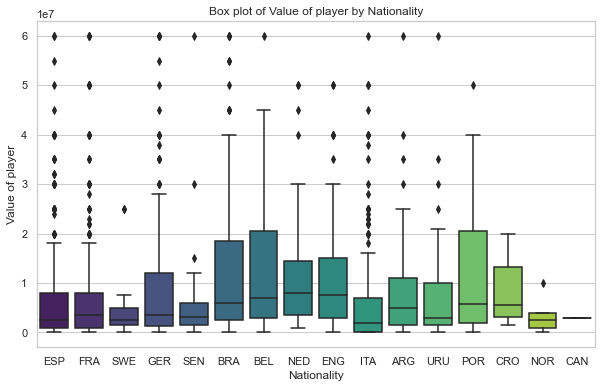

In [40]:

sns.set(style="whitegrid")


# Create box plots for points_per_game grouped by player_position
plt.figure(figsize=(10,6))
sns.boxplot(x='Nationality', y='value', data=nationality_data, palette='viridis')
plt.title('Box plot of Value of player by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Value of player')
plt.show()


In [41]:
data.head()

,Unnamed: 0,player,nationality,position,squad,age,birth_year,value,height,position2,...,tackles,tackles_won,tackles_def_3rd,pressures,pressure_regains,pressure_regain_pct,saves,save_pct,Code Nationality,Nationality
0,379,Burgui,es ESP,FW\tMF,AlavÃ©s,23,1993,1800000,186,attack - Left Winger,...,12,7,4,199,47,23.6,0,0.0,es,ESP
1,2530,RaphaÃ«l Varane,fr FRA,DF,Real Madrid,24,1993,70000000,191,Defender - Centre-Back,...,22,14,18,242,86,35.5,0,0.0,fr,FRA
2,721,RubÃ©n Duarte,es ESP,DF,AlavÃ©s,21,1995,2000000,179,Defender - Left-Back,...,54,29,32,345,83,24.1,0,0.0,es,ESP
3,2512,Samuel Umtiti,fr FRA,DF,Barcelona,23,1993,60000000,182,Defender - Centre-Back,...,40,26,27,211,85,40.3,0,0.0,fr,FRA
4,882,Manu GarcÃ­a,es ESP,MF,AlavÃ©s,31,1986,1800000,183,midfield - Defensive Midfield,...,90,69,38,615,145,23.6,0,0.0,es,ESP


In [42]:
data[['Pos1', 'Pos2']] = data.position2.str.split(" -", expand = True)
data.Pos1.unique()

array(['attack', 'Defender', 'midfield', 'Goalkeeper'], dtype=object)

In [43]:
attack_data = data[data.Pos1 == 'attack']
defense_data = data[data.Pos1 == 'Defender']
mid_data = data[data.Pos1 == 'midfield']
gk_data = data[data.Pos1 == 'Goalkeeper']

In [44]:
# Computing the correlation matrix
correlation_matrix = attack_data.corr()

value_vars = correlation_matrix.value.sort_values(ascending = False)
value_vars = value_vars[1:13]
value_vars = value_vars.index.tolist()
value_vars

['goals',
 'shots_on_target',
 'npxg',
 'xg',
 'shots_total',
 'xa',
 'passes_into_penalty_area',
 'passes_completed',
 'passes',
 'passes_into_final_third',
 'minutes',
 'minutes_90s']

In [45]:
X = attack_data.loc[:, value_vars]
y = attack_data.value
X = sm.add_constant(X)
ols = sm.OLS(y, X)
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     91.79
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          5.69e-130
Time:                        13:55:54   Log-Likelihood:                -11567.
No. Observations:                 648   AIC:                         2.316e+04
Df Residuals:                     635   BIC:                         2.322e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     4.835e+06   9.08e+05      5.327      0.000    3.05e+06    6.62e+06
goals                      2.21e+06   3.43e+05      6.437      0.000    1.54e+06    2.88e+06
shots_on_target           -291.2466   2.27e+05     -0.001      0.999   -4.47e+05    4.46e+05
npxg                      3.749e+06   8.85e+05      4.237      0.000    2.01e+06    5.49e+06
xg                       -1.897e+06    7.8e+05     -2.433      0.015   -3.43e+06   -3.66e+05
shots_total               4.001e+04   8.85e+04      0.452      0.651   -1.34e+05    2.14e+05
xa                        1.687e+06   6.71e+05      2.512      0.012    3.68e+05    3.01e+06
passes_into_penalty_area  4.371e+05   9.23e+04      4.737      0.000    2.56e+05    6.18e+05
passes_completed          6.291e+04   1.94e+04      3.238      0.001    2.48e+04    1.01e+05
passes                    -4.18e+04   1.84e+04     -2.271      0.023   -7.79e+04   -5659.900
passes_into_final_third   5.263e+04    6.1e+04      0.863      0.389   -6.72e+04    1.72e+05
minutes                   1.276e+05   2.13e+05      0.598      0.550   -2.91e+05    5.47e+05
minutes_90s              -1.303e+07   1.92e+07     -0.679      0.497   -5.07e+07    2.47e+07
==============================================================================
Omnibus:                      348.555   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4384.300
Skew:                           2.106   Prob(JB):                         0.00
Kurtosis:                      15.026   Cond. No.                     5.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

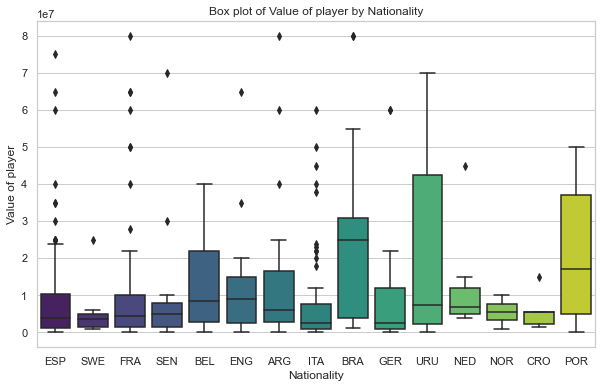

In [46]:
nationality_data = attack_data[attack_data['Nationality'].isin(nations)]
nationality_data = nationality_data[np.abs(stats.zscore(nationality_data['value'])) < 3]
sns.set(style="whitegrid")


# Create box plots for points_per_game grouped by player_position
plt.figure(figsize=(10,6))
sns.boxplot(x='Nationality', y='value', data=nationality_data, palette='viridis')
plt.title('Box plot of Value of player by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Value of player')
plt.show()



In [47]:
# Computing the correlation matrix
correlation_matrix = defense_data.corr()

value_vars = correlation_matrix.value.sort_values(ascending = False)
value_vars = value_vars[1:13]
value_vars = value_vars.index.tolist()
value_vars




['passes_completed',
 'passes_into_final_third',
 'passes',
 'npxg',
 'xg',
 'shots_total',
 'shots_on_target',
 'minutes',
 'minutes_90s',
 'games_starts',
 'games',
 'goals']

In [48]:
X = defense_data.loc[:, value_vars]
X = sm.add_constant(X)
y = defense_data.value
ols = sm.OLS(y, X)
ols_result = ols.fit()
ols_result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     41.64
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           6.50e-75
Time:                        13:56:51   Log-Likelihood:                -13163.
No. Observations:                 757   AIC:                         2.635e+04
Df Residuals:                     744   BIC:                         2.641e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2.585e+06   6.94e+05      3.727      0.000    1.22e+06    3.95e+06
passes_completed         3.973e+04   5745.864      6.915      0.000    2.85e+04     5.1e+04
passes_into_final_third  5.611e+04   1.94e+04      2.887      0.004     1.8e+04    9.43e+04
passes                  -2.276e+04   6041.399     -3.767      0.000   -3.46e+04   -1.09e+04
npxg                      2.07e+06   1.82e+06      1.135      0.257   -1.51e+06    5.65e+06
xg                       2.133e+05   1.64e+06      0.130      0.896      -3e+06    3.43e+06
shots_total              1.015e+05   9.63e+04      1.054      0.292   -8.76e+04    2.91e+05
shots_on_target           2.92e+05   2.69e+05      1.084      0.279   -2.37e+05    8.21e+05
minutes                  7.027e+04   1.29e+05      0.545      0.586   -1.83e+05    3.24e+05
minutes_90s             -6.442e+06   1.16e+07     -0.556      0.578   -2.92e+07    1.63e+07
games_starts            -2.195e+05   4.31e+05     -0.509      0.611   -1.07e+06    6.27e+05
games                   -1.369e+05   1.71e+05     -0.801      0.423   -4.72e+05    1.99e+05
goals                   -4.018e+05   5.01e+05     -0.803      0.422   -1.38e+06    5.81e+05
==============================================================================
Omnibus:                      307.784   Durbin-Watson:                   1.549
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1871.307
Skew:                           1.725   Prob(JB):                         0.00
Kurtosis:                       9.887   Cond. No.                     8.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

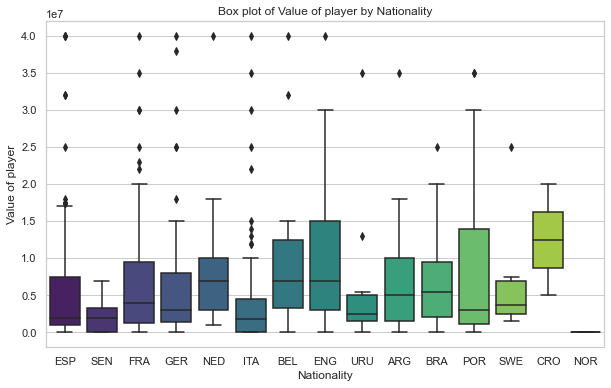

In [49]:
nationality_data = defense_data[defense_data['Nationality'].isin(nations)]
nationality_data = nationality_data[np.abs(stats.zscore(nationality_data['value'])) < 3]
sns.set(style="whitegrid")


# Create box plots for points_per_game grouped by player_position
plt.figure(figsize=(10,6))
sns.boxplot(x='Nationality', y='value', data=nationality_data, palette='viridis')
plt.title('Box plot of Value of player by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Value of player')
plt.show()

In [50]:
# Computing the correlation matrix
correlation_matrix = mid_data.corr()

value_vars = correlation_matrix.value.sort_values(ascending = False)
value_vars = value_vars[1:13]
value_vars = value_vars.index.tolist()
value_vars



['passes_into_penalty_area',
 'xa',
 'shots_on_target',
 'goals',
 'shots_total',
 'passes_completed',
 'npxg',
 'passes',
 'passes_into_final_third',
 'xg',
 'goals_assists_pens_per90',
 'goals_assists_per90']

In [51]:
X = mid_data.loc[:, value_vars]
X = sm.add_constant(X)
y = mid_data.value
ols = sm.OLS(y, X)
ols_result = ols.fit()
ols_result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     56.70
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           2.40e-92
Time:                        13:57:50   Log-Likelihood:                -11505.
No. Observations:                 653   AIC:                         2.304e+04
Df Residuals:                     640   BIC:                         2.309e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     6.667e+05    7.9e+05      0.844      0.399   -8.85e+05    2.22e+06
passes_into_penalty_area  2.482e+05   7.07e+04      3.509      0.000    1.09e+05    3.87e+05
xa                        2.625e+06   6.09e+05      4.312      0.000    1.43e+06    3.82e+06
shots_on_target          -5.049e+04   2.16e+05     -0.233      0.815   -4.75e+05    3.74e+05
goals                     1.928e+06   5.14e+05      3.751      0.000    9.19e+05    2.94e+06
shots_total                6.13e+04   8.43e+04      0.728      0.467   -1.04e+05    2.27e+05
passes_completed          9.023e+04   9550.100      9.448      0.000    7.15e+04    1.09e+05
npxg                      6.311e+06   1.82e+06      3.460      0.001    2.73e+06    9.89e+06
passes                   -7.675e+04   8214.507     -9.343      0.000   -9.29e+04   -6.06e+04
passes_into_final_third   2.401e+04   2.39e+04      1.006      0.315   -2.29e+04    7.09e+04
xg                       -6.664e+06   1.77e+06     -3.771      0.000   -1.01e+07   -3.19e+06
goals_assists_pens_per90 -4.141e+07   3.45e+07     -1.201      0.230   -1.09e+08    2.63e+07
goals_assists_per90       4.711e+07   3.43e+07      1.374      0.170   -2.02e+07    1.14e+08
==============================================================================
Omnibus:                      330.509   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3261.209
Skew:                           2.032   Prob(JB):                         0.00
Kurtosis:                      13.166   Cond. No.                     1.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

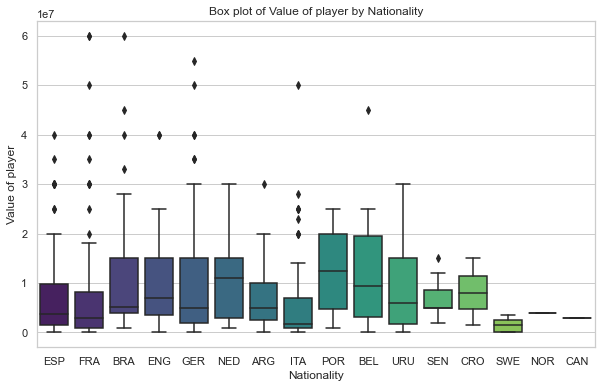

In [52]:
nationality_data = mid_data[mid_data['Nationality'].isin(nations)]
nationality_data = nationality_data[np.abs(stats.zscore(nationality_data['value'])) < 3]
sns.set(style="whitegrid")


# Create box plots for points_per_game grouped by player_position
plt.figure(figsize=(10,6))
sns.boxplot(x='Nationality', y='value', data=nationality_data, palette='viridis')
plt.title('Box plot of Value of player by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Value of player')
plt.show()

In [53]:
# Computing the correlation matrix
correlation_matrix = gk_data.corr()

value_vars = correlation_matrix.value.sort_values(ascending = False)
value_vars = value_vars[1:13]
value_vars = value_vars.index.tolist()
value_vars



['minutes_90s',
 'minutes',
 'games_starts',
 'games',
 'passes_completed',
 'saves',
 'passes',
 'birth_year',
 'pressure_regain_pct',
 'save_pct',
 'height',
 'passes_into_final_third']

In [54]:

X = gk_data.loc[:, value_vars]
X = sm.add_constant(X)
y = gk_data.value
ols = sm.OLS(y, X)
ols_result = ols.fit()
ols_result.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     9.733
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           4.12e-14
Time:                        13:58:22   Log-Likelihood:                -3040.4
No. Observations:                 174   AIC:                             6107.
Df Residuals:                     161   BIC:                             6148.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.039e+09   3.23e+08     -3.217      0.002   -1.68e+09   -4.01e+08
minutes_90s              2.029e+07   4.82e+07      0.421      0.674   -7.48e+07    1.15e+08
minutes                 -1.568e+05   5.32e+05     -0.295      0.769   -1.21e+06    8.94e+05
games_starts            -2.036e+06   2.19e+06     -0.928      0.355   -6.37e+06     2.3e+06
games                    -2.89e+06   1.94e+06     -1.493      0.137   -6.71e+06    9.33e+05
passes_completed         6.296e+04   1.65e+04      3.808      0.000    3.03e+04    9.56e+04
saves                    -8.12e+04   6.54e+04     -1.242      0.216    -2.1e+05    4.79e+04
passes                  -6.527e+04   1.53e+04     -4.264      0.000   -9.55e+04    -3.5e+04
birth_year               5.206e+05   1.65e+05      3.163      0.002    1.96e+05    8.46e+05
pressure_regain_pct      3.561e+04   3.59e+04      0.992      0.323   -3.53e+04    1.06e+05
save_pct                 1.329e+07   5.37e+06      2.475      0.014    2.69e+06    2.39e+07
height                  -2.963e+04   1.81e+05     -0.164      0.870   -3.87e+05    3.28e+05
passes_into_final_third  1.467e+05   9.11e+04      1.609      0.110   -3.33e+04    3.27e+05
==============================================================================
Omnibus:                      118.267   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.641
Skew:                           2.501   Prob(JB):                    2.48e-204
Kurtosis:                      13.213   Cond. No.                     1.21e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

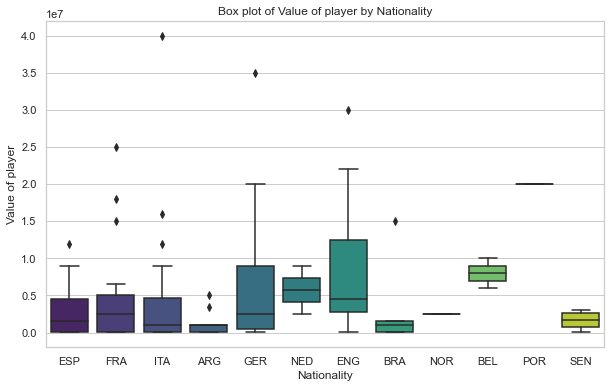

In [55]:
nationality_data = gk_data[gk_data['Nationality'].isin(nations)]
nationality_data = nationality_data[np.abs(stats.zscore(nationality_data['value'])) < 3]
sns.set(style="whitegrid")


# Create box plots for points_per_game grouped by player_position
plt.figure(figsize=(10,6))
sns.boxplot(x='Nationality', y='value', data=nationality_data, palette='viridis')
plt.title('Box plot of Value of player by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Value of player')
plt.show()

In [56]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind
import numpy as np

In [57]:
# Perform ANOVA
f_stat, p_value_anova = f_oneway(attack_data.value, mid_data.value, defense_data.value, gk_data.value)

# Print the ANOVA results
print(f"ANOVA: f_stat={f_stat:.2f}, p_value={p_value_anova:.2f}")

# Prepare the data for Tukey's HSD test and Bonferroni correction
df_concat = pd.concat([attack_data.value, mid_data.value, defense_data.value, gk_data.value])
labels = ['Attack'] * len(attack_data) + ['Midfield'] * len(mid_data) + ['Defense'] * len(defense_data) + ['Goalkeeping'] * len(gk_data)

alpha = 0.05
# Perform Tukey's HSD Test
print("\nTukey's HSD Test:")
tukey = pairwise_tukeyhsd(endog=df_concat, groups=labels, alpha=alpha)
print(tukey)

# Perform pairwise t-tests with Bonferroni correction
print("\nPairwise t-tests with Bonferroni Correction:")
comparisons = [('attack', 'Defender'), ('attack', 'midfield'), ('attack', 'Goalkeeper'), ('midfield', 'Defender'), ('midfield', 'Goalkeeper'), ('Defender', 'Goalkeeper')]
# comparisons = [(gsw, lakers), (gsw, bucks), (bucks, lakers)]

bonferroni_alpha = alpha / len(comparisons)
for group1, group2 in comparisons:
    stat, p = ttest_ind(data[data['Pos1'] == group1]['value'],
                        data[data['Pos1'] == group2]['value'])
    print(f"{group1} vs {group2}: t={stat:.2f}, p={p:.2f}, p<{bonferroni_alpha} -> {'Significant' if p < bonferroni_alpha else 'Not Significant'}")


ANOVA: f_stat=12.77, p_value=0.00

Tukey's HSD Test:
              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
   group1      group2      meandiff   p-adj      lower         upper     reject
-------------------------------------------------------------------------------
     Attack     Defense -4929846.1683    0.0 -7208148.0775  -2651544.259   True
     Attack Goalkeeping  -6241336.739 0.0001 -9876151.9462 -2606521.5319   True
     Attack    Midfield -2809729.8319  0.012 -5170224.9652  -449234.6986   True
    Defense Goalkeeping -1311490.5708 0.7821 -4890483.4248  2267502.2833  False
    Defense    Midfield  2120116.3363 0.0778  -153481.1509  4393713.8236  False
Goalkeeping    Midfield  3431606.9071  0.072  -200261.4185  7063475.2327  False
-------------------------------------------------------------------------------

Pairwise t-tests with Bonferroni Correction:
attack vs Defender: t=5.29, p=0.00, p<0.008333333333333333 -> Significant
attack vs midfield: t=2.61,